In [ ]:
import numpy.random as npr
import numpy as np
import pandas as pd
import pingouin as pg
import seaborn as sns

import matplotlib.pyplot as plt
import scipy.stats as stats

## This notebook uses the following csv files located in Brightspace / Content / Data:

zeppo.csv

harpo.csv

chico.csv

awesome.csv

# Comparing one or two means

This chapter is adapted from Danielle Navarro's excellent [Learning Statistics with R](https://learningstatisticswithr.com) book by Todd Gureckis (2020) and updated by Shannon Tubridy (2021).  The main text has mainly been left intact with a few modifications, and the code has been adapted for Python.


In many cases in science you will find yourself in a situation where your outcome variable is interval or ratio scale and you're interested in is whether the average value of the outcome variable is higher in one group or another. 

For instance, a psychologist might want to know if anxiety levels are higher among parents than non-parents, or if working memory capacity is reduced by listening to music (relative to not listening to music). In a medical context, we might want to know if a new drug increases or decreases blood pressure. 

In all these situations, our outcome variable is a fairly continuous, interval or ratio scale variable; and our predictor is a binary "grouping" variable. In other words, we want to compare the means of the two groups. 

The standard answer to the problem of comparing means is to use a $t$-test. There are several varieties depending on exactly what question you want to solve. 

This chapter focuses on different types of $t$-test: 
- one sample $t$-tests
- independent samples $t$-tests and Welch's test
- paired samples $t$-tests. 

After that, we'll talk a bit about Cohen's $d$, which is the standard measure of effect size for a $t$-test. The later sections of the chapter focus on the assumptions of the $t$-tests, and possible remedies if they are violated.

### The inference problem that the test addresses

Let's use a simple example. Dr Zeppo grades his introductory statistics class on a curve. Let's suppose that the average grade in his class is 67.5, and the standard deviation is 9.5. 

Of his students, 20 of them also take psychology classes. 

Do the psychology students tend to get the same grades as everyone else (i.e., mean 67.5) or do they tend to score higher or lower? 

We'll use the  `zeppo.csv` file which has the `grades` of these Psychology students.

Load the zeppo class data (zeppo.csv) into a datafame. Use the optional `index_col=` input to specify that the first column in the csv (column 0) should be used as the dataframe index.

In [ ]:
zeppo_df = pd.read_csv('../../../data/stats_data/zeppo.csv', index_col=0)
zeppo_df.head()

#### Review check: how can we get the number of rows and columns in a dataframe?

In [ ]:
zeppo_df.shape

Calculate the mean of the grades column:

In [ ]:
zeppo_df['grades'].mean()

It looks like the psychology students are scoring a bit higher than normal: that sample mean of $\bar{X} = 72.3$ is a fair bit higher than the hypothesized population mean of $\mu = 67.5$, but on the other hand, a sample size of $N = 20$ isn't all that big. Maybe it's pure chance. 

### Constructing the hypothesis test

Our null hypothesis, $H_0$, is that the true population mean $\mu$ for psychology student grades is 67.5\%; and our alternative hypothesis is that the population mean *isn't* 67.5\%. 

$
\begin{array}{ll}
H_0: & \mu = 67.5 \\
H_1: & \mu \neq 67.5
\end{array}
$

The null hypothesis $H_0$ and the alternative hypothesis $H_1$ for our test are both illustrated graphically below. 

This next couple of code cells use numpy and scipy.stats to make example figures showing a normal distribution and how the null and alternative hypothesis relate

#### Getting the probability of an observation from a normal distribution

The scipy.stats package includes functions that will tell you the probability of sampling some value `x` from a normal (gaussian) distribution with a particular mean and standard deviation. This called a probability density function (pdf). Here we will use the pdf for a normal distribution.

We input an x value, the mean of the distribution, and the standard deviation and we get back the probability of x given that distribution

In [ ]:
norm_mean = 1
norm_sd = 3.5
x = 1

# what is probability of observing value of 1
# if randomly sampling from normal distribution with mean=norm_mean and
# sd = norm_sd
y=stats.norm.pdf(x, norm_mean, norm_sd)

print(y)

# you can also input an array of numbers as the x value and get the probability of all of them at once

The numpy library (imported as np) includes a linspace() function that takes a start value, a stop value, and the number of values you want and it returns an array of that many numbers even spaced between start and stop

In [ ]:
# use linspace to get 13 numbers evenly spaced between 0 and 4.4 
np.linspace(0,4.4,13)



In [ ]:
# use matplotlib to make a figure with two subplots
# variable 'ax' contains the handles, or pointers to 
# the two subplots:
fig, ax = plt.subplots(1,2, figsize=(10,4))

# use numpy linspace to get an array of 100 numbers betweeen -5 and 30
x = np.linspace(-5,30,100)

# use scipy.stats.norm.pdf() to get the 
# probability of each x value for a normal 
# distribution of a particular mean and standard deviation:
norm_mean = 12
norm_sd = 3.5

# get the probability of numbers -5 to 30 from
# gaussian (normal) distribution with mean 12 and sd 3.5
y=stats.norm.pdf(x, norm_mean, norm_sd)


# Plot the null hypothesis showing the observed mean of the student data(black line)
# at the center of the candidate origin distribution
# use ax[0] to get the first subplot handle

# make a line plot of the norm.pdf y values for each input x:
ax[0].plot(x,y)

# set some titles and labels:
ax[0].set_ylabel("probability")
ax[0].set_xlabel("value of X")
ax[0].set_title("null hypothesis")

# restrict the y axis to display from 0 to .13
ax[0].set_ylim(0,0.13)

# plot a black line at the center of the distribution (x=12):
ax[0].plot([12,12], [0,0.113], color='k')

# set the xtick and ytick labels to be blank by giving an empty list:
ax[0].set_xticklabels([])
ax[0].set_yticklabels([])

# add a note at the position specified in xy argument
ax[0].annotate("$\mu$ = $\mu_0$", xy=(10,0.12),xytext=(10,0.12))


# do the same thing in the second subplot (ax[1])
# but now put the vertical black line at a different x value:
ax[1].plot(x,y)
ax[1].set_ylabel("probability")
ax[1].set_xlabel("value of X")
ax[1].set_title("alternative hypothesis")
ax[1].set_ylim(0,0.13)
# put the black line at x=18
ax[1].plot([18,18],[0,0.113],color='k')
ax[1].annotate("$\mu \\neq \mu_0$", xy=(16,0.12),xytext=(16,0.12))
ax[1].set_xticklabels([])
ax[1].set_yticklabels([])

# sns.despine() conmand can be used to remove axis lines from the figure
# this is not necessary but is nice for cleaner figures:
sns.despine(top=True, right=True)



# The one-sample $t$-test

### Introducing the $t$-test

The t-test, or *hypothesis test statistic*, was primarily developed by a William Sealy Gosset, who was working as a chemist for the Guinness brewery in the early 1900s. Guinness didn't want competitors to know what they were doing, so Gosset published the work under the pseudonym "A Student", and to this day, the full name of the $t$-test is actually **_Student's $t$-test_**. 

If our null hypothesis is that the true mean is $\mu$, but our sample has mean $\bar{X}$ and our estimate of the population standard deviation is $\hat{\sigma}$, then our $t$ statistic is:

$
t = \frac{\bar{X} - \mu}{\hat{\sigma}/\sqrt{N} }
$

If this estimate has been constructed from $N$ observations, then the sampling distribution turns into a $t$-distribution with $N-1$ **_degrees of freedom_** (df). 

The $t$ distribution is very similar to the normal distribution, but has "heavier" tails as illustrated next. Notice, though, that as the degrees of freedom gets larger, the $t$-distribution starts to look identical to the standard normal distribution. 

In [ ]:
# make an empty matplotlib figure with two subplots
fig, ax = plt.subplots(1,2,figsize=(10,4))


# make two sets of y values for 100 steps of x ranging from -5 to 5
x = np.linspace(-5,5,100)

# first make a gaussian normal distribution with mean 0 and sd 1
y= stats.norm.pdf(x, 0,1)


# now use the scip.stats t distribution pdf function
# to make the t distribution
# this function takes a degrees of freedom argument (df=)
# and a value and returns the p
y2 = stats.t.pdf(x, df=2)

# plot our normal distribution (x, y)
# put it in the first subplot, accessed by ax[0]
ax[0].plot(x,y,label='N($\mu$=0,sd=1)')


# plot the t distribution on the same axes (subplot):
ax[0].plot(x,y2,'r',label='t (df=2)')
ax[0].set_ylabel("probability")
ax[0].set_xlabel("value of X")
ax[0].legend(loc='best', frameon=False)

# Do the same as before, but now make
# t distribution with df=10
x = np.linspace(-5,5,100)
y=stats.norm.pdf(x,0,1)
y2=stats.t.pdf(x,10,0,1)

# plot on the second subplot (ax[1])
ax[1].plot(x,y,label='N($\mu$=0,sd=1)')
ax[1].plot(x,y2,'r',label='t (df=10)')
ax[1].set_ylabel("probability")
ax[1].set_xlabel("value of X")
ax[1].legend(loc='best', frameon=False)
sns.despine(top=True, right=True)


The $t$ distribution with 2 degrees of freedom (left) and 10 degrees of freedom (right), with a standard normal distribution (i.e., mean 0 and std dev 1) plotted as a blue line for comparison purposes. Notice that the $t$ distribution has heavier tails (higher kurtosis) than the normal distribution; this effect is quite exaggerated when the degrees of freedom are very small, but negligible for larger values. In other words, for large $df$ the $t$ distribution is essentially identical to a normal distribution.


## Doing one sample t tests in Python with pinguoin

There are several Python packages that include a t-test function. For example scipy.stats and statsmodels libraries are fairly common. We will use [pingouin](https://pingouin-stats.org/index.html) which we have already seen. Pingouin has a nice simple interface and provides easy access to most common statistics.
 
First make sure import pingouin to our current session:

In [ ]:
import pingouin as pg

Next we run the function `pg.ttest`.  The documentation for this command is [here](https://pingouin-stats.org/generated/pingouin.ttest.html#pingouin.ttest). 

It's pretty straightforward to use: all you need to do is specify `x`, the variable containing the data, and `y`, the true population mean according to the null hypothesis. 

So to test whether the psychology students in Dr Zeppo's class are scoring higher or lower than the class average of 67.5 we can do this:

In [ ]:
# remind ourselves about the data we're using
zeppo_df.head()

In [ ]:
zeppo_df['grades'].mean()

In [ ]:
# run the ttest and put the results in a new variable:
ttest_results = pg.ttest(x=zeppo_df['grades'], y=67.5)

# check out the results:
ttest_results

The first column in the output is the value of the t-statistic (2.255).   

The 'dof' refers to the degrees of freedom which is one less than the number of observations in x (so 19).  Here we conducted a two-sided or two-tailed test. 

Then the $p$-value (0.036) of the test of the null hypothesis that the population mean equals 67.5 (what we provided as y). 

The CI95% is the 95% confidence interval around the mean of the provided data $x$. 

The estimated *effect size* cohen's d is 0.504, more on that later.  

The final columns are a Bayes Factor in support of the alternative hypothesis and the post-hoc power estimate.  We will ignore those.


If these were real data, we might be pleased to see that (i.e. $p$ value below .05). We could report the result by saying something like this:

> With a mean grade of 72.3, the psychology students scored slightly higher than the average grade of 67.5 ($t(19) = 2.25$, $p<.05$).

where $t(19)$ is shorthand notation for a $t$-statistic that has 19 degrees of freedom. 

All of the information needed for that reporting is in the pg output.

We can access the values if we need them:

In [ ]:
# get the t value
print(ttest_results['T'][0])

# get the degrees of freedom
print(ttest_results['dof'][0])

# get the p value
print(ttest_results['p-val'][0])

Although we will generally let a statistics library do the calculations for us, the one-sample t-statistic is straightforward to calculate.

Here's the formula for the one-sample t-statistic:


$
t = \frac{\bar{X} - \mu}{\hat{\sigma}/\sqrt{N} }
$

And here is the calculation for Dr Zeppos grades:

In [ ]:
# get the values we need:

# sample size
n = len(zeppo_df)

# mean of the data:
xbar = zeppo_df['grades'].mean()

# sd of the data:
sd = zeppo_df['grades'].std()

# null_mean is the comparison value we are testing against
null_mean = 67.5

In [ ]:
# calculuate the t-stat
tstat_hand = (xbar-null_mean) / (sd/np.sqrt(n))
                       
    
# compare our manual calculation to pinguoin:    
print(f'hand calculated t-stat: {tstat_hand}')
print(f'pingouin calculated t-stat: {ttest_results["T"].values[0]}\n')

# use the scipy t distribution pdf to get the pvalue
# for this t-stat and degrees of freedom
print(stats.t.pdf(tstat_hand, n-1))
print(ttest_results['p-val'][0])

# things are mostly the same aside from some differences due to rounding

# Doing one sample t-test with scipy.stats

In [ ]:
# stats.ttest_1samp takes in the set of data and the comparison (population) mean
scipy_results = stats.ttest_1samp(zeppo_df['grades'], null_mean)

# the result is a tuple with first entry being the t value and the second the pvalue
scipy_results[0]
scipy_results[1]

### Assumptions of the one sample $t$-test


- *Normality*. We're assuming that the the population distribution is normal.
- *Independence*. We have to assume that the observations in our sample are generated independently of one another.

Overall, these two assumptions aren't terribly unreasonable, and as a consequence the one-sample $t$-test is pretty widely used in practice as a way of comparing a sample mean against a hypothesised population mean.

## The independent samples $t$-test (Student test)

Although the one sample $t$-test has its uses, a common situation arises when you've got two different groups of observations. 

In psychology, this tends to correspond to two different groups of participants, where each group corresponds to a different condition in your study. For each person in the study, you measure some outcome variable of interest, and the research question that you're asking is whether or not the two groups have the same population mean. This is the situation that the independent samples $t$-test is designed for. 

### The data

Suppose we have 33 students taking Dr Harpo's statistics lectures and unlike Dr Zeppo we don't really know anything about what the average grade is for the class as a whole. 

There are two tutors for the class, Anastasia and Bernadette. There are $N_1 = 15$ students in Anastasia's tutorials, and $N_2 = 18$ in Bernadette's tutorials. The research question now is whether Anastasia or Bernadette is a better tutor, or if it doesn't make much of a difference. These grades are located in the `harpo.csv` file.


First load the file and have a look at what variables it contains:

In [ ]:
harpo_df=pd.read_csv('../../../data/stats_data/harpo.csv',index_col=0)
harpo_df.head()

As we can see, there's a single data frame with two variables, `grade` and `tutor`. The `grade` variable is a numeric vector, containing the grades for all $N = 33$ students taking Dr Harpo's class; the `tutor` variable is a factor that indicates who each student's tutor was. 

We can calculate means and standard deviations individually or use dataframe.describe(). We can look at those values separately according to tutor by using the dataframe groupby() function first:

In [ ]:
harpo_df.groupby('tutor').mean()

In [ ]:
harpo_df.groupby('tutor').std()

In [ ]:
harpo_df.groupby('tutor').describe()

We can get a more detailed feel for the data by plotting histograms of the distribution of grades for each tutor.

In [ ]:
# first subselect the rows that only have 'Anastasia' as tutor
# check for the rows where 'tutor'==Anastasia and then take just 
# the ['grade'] column:
an_grades = harpo_df[harpo_df['tutor']=="Anastasia"]['grade']

In [ ]:
# use seaborn displot() to make a histogram, and use the
# bins= optional argument to specify which score ranges we want 
# to use as bins for this histogram (from 40,100 in steps of 5)


sns.displot(an_grades, bins=np.arange(40,100,5))

# add a title that tells us the mean of the data
an_mean = an_grades.mean()
plt.title(f'Anastasia students (mean={np.round(an_mean,2)})')

### In class exercise: produce the same distribution of grades but now for tutor Bernadette

In [ ]:
### put Bernadette grade plotting code here


We can also look at a simpler plot showing the means and corresponding confidence intervals for both groups of students.

In [ ]:
sns.catplot(x='tutor', 
            y='grade', 
            data=harpo_df, 
            kind='bar',
            ci=95)

On the basis of visual inspection, it does look like there’s a difference between the grades in the two tutoring groups, though it’s hard to say for sure.

### Independent samples t test

The **_independent samples $t$-test_** comes in two different forms, Student's and Welch's. 

The original Student $t$-test -- which is the one I'll describe in this section -- is the simpler of the two, but relies on much more restrictive assumptions than the Welch $t$-test. 

Our goal is to determine whether two "independent samples" of data are drawn from populations with the same mean (the null hypothesis) or different means (the alternative hypothesis). 


##### Independent t-test vs paired t-test
By "independent" samples, we mean is that there's no special relationship between observations in the two samples. This is in contrast to the paired-samples $t$-test discussed later. If we have where participants are randomly allocated to one of two groups, and we want to compare the two groups' mean performance on some outcome measure, then an independent samples $t$-test (rather than a paired samples $t$-test) is what we're after.

Let $\mu_1$ denote the true population mean for group 1 (e.g., Anastasia's students), and $\mu_2$ denote true population mean for group 2 (e.g., Bernadette's students). 

Let $\bar{X}_1$ and $\bar{X}_2$ denote the observed sample means for both of these groups. 

Our null hypothesis states that the two population means are identical ($\mu_1 = \mu_2$) and the alternative to this is that they are not ($\mu_1 \neq \mu_2$): 

$
\begin{array}{ll}
H_0: & \mu_1 = \mu_2  \\
H_1: & \mu_1 \neq \mu_2
\end{array}
$

# Doing independent sample ttest with Pingouin

It is important to know what your statistical tests are calculating and the assumptions on which they rest. In a Students independent t-test **we are assuming that both groups have the same standard deviation** and we estimate that by taking a weighted average of each group's individual standard deviation. 

**We are also assuming that the data are normally distributed.** Later in this section we will talk about testing for these assumptions. For now we'll proceed with calculating the independent samples test with pinguoin.

The independent samples $t$-test is just a special case of the pingouin `ttest()` function from earlier.  Instead of providing argument $y$ as a single number (the null hypothesis in a one sample test), we provide another list of numbers which is the second group:

In [ ]:
# Select some data from our class dataframe

# get all the grades for Bernadette's students in a variable
group1 = harpo_df[harpo_df['tutor']=="Bernadette"]['grade']
                        
# and the same for Anastasia's students
group2 = harpo_df[harpo_df['tutor']=="Anastasia"]['grade']

In [ ]:
# do two sample t-test by giving one set of numbers as x= and another as y = 
two_sample_results = pg.ttest(x=group1, y=group2, correction=False)
two_sample_results

Here argument x and y just contain the data from each of the two groups. By saying `correction = False`, we're really doing is telling pingouin to use the *Student* independent samples $t$-test. More on that later. 

The output should look familiar including the test results ($t$-statistic, the degrees of freedom, and the $p$-value) like the one-sample test earlier. One note: the confidence interval here is the CI around the *difference* in the group means the difference between the two sample means is 5.4. But of course the difference between population means might be bigger or smaller than this. The confidence interval reported by pingouin `ttest()` function tells you that there's a 95\% chance that the true difference between means lies between 0.2 and 10.8.  

In any case, the difference between the two groups is significant (just barely), so we might write up the result using text like this:

> The mean grade in Anastasia's class was 74.5\% (std dev = 9.0), whereas the mean in Bernadette's class was 69.1\% (std dev = 5.8). A Student's independent samples $t$-test showed that this 5.4\% difference was significant ($t(31) = 2.1$, $p<.05$, $CI_{95} = [0.2, 10.8]$, $d = .74$), suggesting that a genuine difference in learning outcomes has occurred.  

Notice that I've included the confidence interval and the effect size in the stat block. People don't always do this. At a bare minimum, you'd expect to see the $t$-statistic, the degrees of freedom and the $p$ value. So you should include something like this at a minimum: $t(31) = 2.1$, $p<.05$.

### Positive and negative $t$ values

One common worry when getting familiar with $t$-test results is getting negative values for the $t$-statistic, and uncertainty in interpreting it.  What's happening here is very simple. The $t$-statistic being calculated is of the form 

$
t = \frac{\mbox{(mean 1)} -\mbox{(mean 2)}}{ \mbox{(SE)}}
$

If "mean 1" is larger than "mean 2" the $t$ statistic will be positive, whereas if "mean 2" is larger then the $t$ statistic will be negative. Similarly, the confidence interval is the confidence interval for the difference "(mean 1) minus (mean 2)", which will be the reverse of what you'd get if you were calculating the confidence interval for the difference "(mean 2) minus (mean 1)".

Mathematically the choice of assignment to mean 1 and mean 2 is arbitrary, but in practice you need to choose one.

Consider the following two ways to run the above test:

In [ ]:
pg.ttest(x=group1, y=group2, correction=False)

In [ ]:
pg.ttest(x=group2, y=group1, correction=False)

Notice that everything is the same except the t-value and the confidence intervals which have their sign flipped depending on which one we call $x$ and which we call $y$ (it is arbitrary). 

This can make it hard to figure out which group was bigger just by looking at the t-stat, so it can sometimes be easier to just look at the actual group means.

In [ ]:
sns.catplot(x="tutor", 
            y="grade", 
            data=harpo_df, 
            kind='bar',
            ci=95)

### Assumptions of the independent samples t-test

For the Student t-test there are three assumptions, some of which we saw previously in the context of the one sample $t$-test:


- *Normality*. Like the one-sample $t$-test, it is assumed that the data are normally distributed. Specifically, we assume that both groups are normally distributed. A bit later we'll discuss how to test for normality, and we'll also discuss possible solutions when data are not normally distributed.
<br><br>
- *Independence*. Once again, it is assumed that the observations are independently sampled. In the context of the Student test this has two aspects to it. Firstly, we assume that the observations within each sample are independent of one another (exactly the same as for the one-sample test). However, we also assume that there are no cross-sample dependencies. If, for instance, it turns out that you included some participants in both experimental conditions of your study (e.g., by accidentally allowing the same person to sign up to different conditions), then there are some cross sample dependencies that you'd need to take into account.
<br><br>
- *Homogeneity of variance* (also called "homoscedasticity"). The third assumption is that the population standard deviation is the same in both groups.  This is not always true for several reasons (if one condition in a experiment is harder it might not *only* influence the mean of the data but also the variability). However, there's a very simple remedy for this assumption, which I'll talk about in the next section.

## The independent samples $t$-test (Welch test)

The biggest problem with using the Student test in practice is the third assumption listed in the previous section: it assumes that both groups have the same standard deviation. This is rarely true in real life. If you recall running Levene's test in a stats class this is what you were assessing. If Levene's test indicates unequal variance between the two groups we can run the Welch's test.

We'll talk a little bit about how you can check this assumption later on because it does crop up in a few different places, not just the $t$-test. 

### Doing the Welch t-test test in Pinguoin

To run a Welch test in Python is pretty easy. All you have to do in pingouin it to tell the `ttest()` function to not assume equal variances by setting the optional input `correction=True`.  I like to do this explicitly.  If you do not provide the correction command to pinguoin it will run a test (see below) to see if the standard deviations seem like they might be different and then choses to use the correct or not.  But being explicit in your code is good practice so you don't end up with surprises or uncertanties about what was done.

In [ ]:
pg.ttest(x=group1, y=group2, correction=True)

In [ ]:
pg.ttest(x=group1, y=group2, correction=False)

The output has exactly the same format as it did last time.  Of course all the numbers are a bit different, and our results isn't significant anymore

When we ran the Student test, we did get a significant effect; but the Welch test on the same data set is not ($t(23.03) = 2.03$, $p = .054$). 

As a general rule, it's not a good idea to go out of your way to try to interpret or explain the difference between a $p$-value of .049 and a $p$-value of .051. If this sort of thing happens in real life, the *difference* in these $p$-values is almost certainly due to chance. 

What does matter is that you take a little bit of care in thinking about what test you use. The Student test and the Welch test have different strengths and weaknesses. If the two populations really do have equal variances, then the Student test is slightly more powerful (lower Type II error rate) than the Welch test. 

However, if they *don't* have the same variances, then the assumptions of the Student test are violated and you may not be able to trust it: you might end up with a higher Type I error rate. So it's a trade off. However, in real life, I tend to prefer the Welch test; because almost no-one *actually* believes that the population variances are identical.

## Indendent sample t-test in scipy
Running independent sample ttest in scipy uses stats.ttest_ind() function



In [ ]:
scip_results = stats.ttest_ind(group1, group2)

# returns t stat and p value:
scip_results

## Welch's t-test in scipy

Running Welchs independent sample ttest simply involves passing an optional `equal_var` argument to the function. By default it is set to True and runs Student's t-test. Set it to false to run Welch's test:


In [ ]:
scip_results = stats.ttest_ind(group1, group2, equal_var=False)
scip_results

### Assumptions of the Welch test

The assumptions of the Welch test are very similar to those made by the Student $t$-test, except that the Welch test does not assume homogeneity of variance. This leaves only the **assumption of normality**, and the **assumption of independence**. The specifics of these assumptions are the same for the Welch test as for the Student test. 




## The paired-samples $t$-test

An independent samples $t$-test is intended to be used in a situation where you have two samples that are independent of one another. This situation arises naturally when participants are assigned randomly to one of two experimental conditions, but it provides a very poor approximation to other sorts of research designs. 

In particular, a repeated measures design -- in which each participant is measured (with respect to the same outcome variable) in both experimental conditions -- is not suited for analysis using independent samples $t$-tests. 

For example, we might be interested in whether listening to music reduces people's working memory capacity. We could measure each person's working memory capacity in two conditions: with music, and without music. In an experimental design such as this one, each participant appears in *both* groups. This requires us to approach the problem in a different way; by using the **_paired samples $t$-test_**.

### The data

The data set that we'll use this time comes from Dr Chico's class. 

Students take two major tests, one early in the semester and one later in the semester. Both tests are difficult, but she argues that by setting hard assessments, students are encouraged to work harder. 

Her theory is that the first test is a bit of a "wake up call" for students: when they realise how hard her class really is, they'll work harder for the second test and get a better mark. Is she right? 

To test this, let's have a look at the `chico.csv` file: 

In [ ]:
import pandas as pd

In [ ]:
# load the dataset, mark the first column to be the index
chico_df=pd.read_csv('../../../data/stats_data/chico.csv', index_col=0)
chico_df.head()

The data frame `chico_df` contains three variables: an `id` variable that identifies each student in the class, the `grade_test1` variable that records the student grade for the first test, and the `grade_test2` variable that has the grades for the second test. Above are the first five students.

At a glance, it does seem like the class is a hard one (most grades are between 50\% and 60\%), but it does look like there's an improvement from the first test to the second one. If we take a quick look at the descriptive statistics:

In [ ]:
chico_df.describe()

we see that this impression seems to be supported. Across all 20 students the mean grade for the first test is 57\%, but this rises to 58\% for the second test. Although given that the standard deviations are 6.6\% and 6.4\% respectively, it could be that the improvement is just illusory; maybe just random variation. 

This impression is reinforced when you see the means and confidence intervals plotted below. 

First let's make a tidy data frame by melting what we have so we can get all the test scores in one column and test1 and test2 in another column:

In [ ]:
chico_df.head()

In [ ]:
# use melt 
# keep the 'id' column as is (id_vars=),
# make a new column called 'testgrade' that will contain values 
# for each of the remaining columns not in id_vars=, and gather all the 
# values that were in those other columns and put then in a column called 'grade',
# lined up with the appropriate value in testgrade
chico_tidy_df = chico_df.melt(id_vars='id', 
                              var_name="testgrade", 
                              value_name='grade')

chico_tidy_df


Now use sns.catplot() with kind = 'point' to get a feel for the means for each test:

In [ ]:
sns.catplot(x='testgrade', 
            y='grade', 
            kind='point',
            data=chico_tidy_df)

## In class exercise: Make a bar plot instead of a line plot to show these data

In [ ]:
# make a bar plot


If we were to rely on this plot alone, we'd come to the same conclusion that we got from looking at the descriptive statistics that the `describe()` function produced. Looking at how wide those confidence intervals are, we'd be tempted to think that the apparent improvement in student performance is pure chance.

Nevertheless, this impression is wrong. To see why, take a look at the scatterplot of the grades for test 1 against the grades for test 2. 

In [ ]:
# use sns.replot() to get scatter of grades 1 and 2
# sns.relplot(x=chico_df['grade_test1'],y=chico_df['grade_test2'])
sns.relplot(x='grade_test1', 
            y='grade_test2', 
            data=chico_df)

# add a line for 1:1 correlation between x and y values
x=np.linspace(40,73,100)

plt.plot(x,x)


In this plot, each dot corresponds to the two grades for a given student: if their grade for test 1 ($x$ co-ordinate) equals their grade for test 2 ($y$ co-ordinate), then the dot falls on the line. 

Points falling above the line are the students that performed better on the second test. Critically, almost all of the data points fall above the diagonal line: almost all of the students *do* seem to have improved their grade, if only by a small amount. 

This suggests that we should be looking at the *improvement* made by each student from one test to the next, and treating that as our raw data. To do this, we'll need to create a new variable for the `improvement` that each student makes, and add it to the `chico` data frame. The easiest way to do this is as follows: 

In [ ]:
# Add improvement column to the chico_df
chico_df['improvement'] = chico_df['grade_test2'] -  chico_df['grade_test1']
chico_df

In [ ]:
# histogram of difference scores here
sns.displot(chico_df['improvement'])

When we look at histogram, it's very clear that there *is* a real improvement here. The vast majority of the students scored higher on the test 2 than on test 1, reflected in the fact that almost the entire histogram is above zero.

### What is the paired samples $t$-test?

So how to analyze these data? 

The solution to the problem is straightforward and we already did all the hard work in the previous section. 

Instead of running an independent samples $t$-test on `grade_test1` and `grade_test2`, we run a *one-sample* $t$-test on the within-subject difference variable, `improvement`. 

And that's it: the paired samples $t$-test really isn't a new test at all: it's a one-sample $t$-test, but applied to the difference between two variables. It's actually very simple; the only reason it merits a discussion as long as the one we've just gone through is that you need to be able to recognize *when* a paired samples test is appropriate, and to understand *why* it's better than an independent samples $t$ test.

# Doing paired test in Pinguoin


One possibility is to follow the process I outlined above: create a "difference" variable and then run a one sample $t$-test on that. Since we've already created a variable called `chico_df['improvement']`, let's do that and do a one-sample test vs 0:

In [ ]:
pg.ttest(x=chico_df['improvement'], y=0)

The output is formatted the same was as it was the last time we used the `ttest()` function, and it confirms our intuition. There's an improvement from test 1 to test 2, and this is significantly different from 0 ($t(19)=6.48, p<.001$). 


But we don't have to compute the difference score variable ourselves. Let's assume that your data are organised like they are in the `chico` data frame, where there are two separate variables, one for each measurement. You can still provide each column as group 1 and group 2 as before but just indicate they are paired with the argument `paired=True`:

In [ ]:
group1 = chico_df['grade_test1']
group2 = chico_df['grade_test2']

pg.ttest(x=group2, y=group1, paired=True)

The numbers are identical to those that come from the one sample test on the improvment column, which of course they have to be given that the paired samples $t$-test is just a one sample test under the hood.

# Doing paired t-test in Scipy

Do do a paired t-test using scipy we could either run a one-sample test on the differences versus zero using the stats.ttest_1samp() function we saw earlier, or use stats.ttest_rel() and input both sets of values:

In [ ]:
stats.ttest_rel(group1, group2)

## Effect size

The most commonly used measure of effect size for a $t$-test is **_Cohen's $d$_** . It's a very simple measure in principle, with quite a few wrinkles when you start digging into the details. We will not get into those details here, but roughly speaking we are looking to calculate something like the difference between means divided by an estimate of the variability:
$
d = \frac{\mbox{(mean 1)} - \mbox{(mean 2)}}{\mbox{std dev}}
$

There are several different version in common usage, and pingouin has a number of different functions for computing [effect sizes](https://pingouin-stats.org/api.html#effect-sizes).  

The main time when you would want Cohen's $d$ is when you're running a $t$-test, and the good news is that the pingouin `ttest()` function we saw already output the cohen's d for the given test.

There isn't a strict way to interpret whether a particular value of Cohen's $d$ is good or bad, but people use a rough guide with numbers something like this:

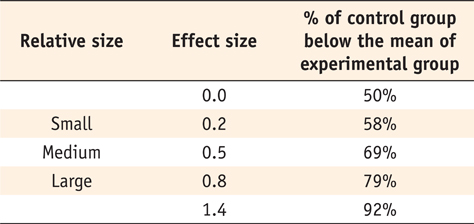


### Cohen's $d$ from one sample using Pingouin

The pingouin ttest() function gives cohen's d as part of the results output:

In [ ]:
pg.ttest(x=zeppo_df['grades'], y=67.5)

Pinguoin also provides functions to compute the effect size on its own.

The structure of this function should seem familiar. The eftype= input allows you to specify other effect size calculations. For now we use 'cohen' because we are running t-tests

In [ ]:
pg.compute_effsize(x=zeppo_df.grades, y=67.5, eftype='cohen')

Overall, then, the psychology students in Dr Zeppo's class are achieving grades (mean = 72.3\%) that are about .5 standard deviations higher than the level that you'd expect (67.5\%) if they were performing at the same level as other students. Judged against Cohen's rough guide, this is a moderate effect size.

We won't go through each type of effect size calculation right now, but hopefully you can see how to read Cohen's d out of a pingouin t-test result, and if you need to compute a different measure of effect size you can see the various eftypes available from pg.compute_effsize() by checking the documentation for that function:

https://pingouin-stats.org/generated/pingouin.compute_effsize.html

## Checking the normality of a sample

All of the tests that we have discussed so far in this chapter have assumed that the data are normally distributed. This assumption is often quite reasonable, but there are lots of ways in which you can end up with variables that are highly non-normal. 

For example, any time you think that your variable is actually the minimum of lots of different things, there's a very good chance it will end up quite skewed. In psychology, response time (RT) data is a good example of this. If you suppose that there are lots of things that could trigger a response from a human participant, then the actual response will occur the first time one of these trigger events occurs. (This is a massive oversimplification.) This means that RT data are systematically non-normal.  

### Shapiro-Wilk tests of normality

The null hypothesis being tested is that a set of $N$ observations is normally distributed. The test statistic that it calculates is conventionally denoted as $W$. The math behind the $W$ statistic is beyond our time for today, but we can get an idea of how it behaves for different data.

To run the test in Python, we use the [scipy shapiro()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html) function ( `stats.shapiro()`). It has only a single argument `x`, which is a numeric vector containing the data whose normality needs to be tested. 

In [ ]:
import scipy.stats as stats

In [ ]:
# numpy.random function normal() gives us random numbers from a 
# normal distribution with a particular mean and sd
m = 2
sd = 1
n_samples = 1000

normal_data = npr.normal(m, sd, n_samples)
sns.displot(normal_data)

For example, when we apply the scipy.stats shapiro() function to  our `normal_data`, we get the following:

In [ ]:
# shapiro gives two outputs:
W, p = stats.shapiro(x=normal_data)

print(f"The value of W is {W}, p={p}")

So, not surprisingly, we have no evidence that these data depart from normality, the p value is high and the value of W is close to 1.0. The null hypothesis for Shapiro test is that the data *are* normally distributed, so failing to reject the null (high p value) means we assume normality.


When reporting the results for a Shapiro-Wilk test, you should (as usual) make sure to include the test statistic $W$ and the $p$ value (the return values of the scipy function), and given that the sampling distribution depends so heavily on $N$ its probably good to include that as well.

### Examples

Let's step through a couple examples of this test for a few different simulated data sets.

First is a histogram for a data set that is highly skewed. As a consequence, the Shapiro-Wilk statistic is around $W~=.80$, reflecting a significant departure from normality ($p<.001$). 

Then are similar plots for a heavy tailed (i.e., high kurtosis) data set: in this case.  The resulting Shapiro-Wilk statistic is $W ~ .80$, again reflecting significant non-normality ($p < .001$).

In [ ]:
skewed_data = np.random.gamma(1,2,100)

W, p = stats.shapiro(x=skewed_data)

print(f"The value of W is {W}, p={p}")

sns.displot(skewed_data,kde=False)


In [ ]:
heavy_tailed_data = np.concatenate((np.random.normal(0,1,80), np.random.normal(1,5,20)))
sns.displot(heavy_tailed_data,kde=False)

W, p = stats.shapiro(x=heavy_tailed_data)

print(f"The value of W is {W}, p={p}")



## Testing non-normal data with Wilcoxon tests

If your data are substantially non-normal but you still want to run something like a $t$-test you can use Wilcoxon tests. 

Like the $t$-test, the Wilcoxon test comes in two forms, one-sample and two-sample, and they're used in more or less the exact same situations as the corresponding $t$-tests. 

Unlike the $t$-test, the Wilcoxon test doesn't assume normality, which is nice. In fact, they don't make any assumptions about what kind of distribution is involved: in statistical jargon, this makes them **_nonparametric tests_**. 

While avoiding the normality assumption is nice, there's a drawback: the Wilcoxon test is usually less powerful than the $t$-test (i.e., higher Type II error rate). I won't discuss the Wilcoxon tests in as much detail as the $t$-tests, but I'll give you a brief overview.

### Two sample Wilcoxon test

I'll start by describing the **_two sample Wilcoxon test_** (also known as the Mann-Whitney test), since it's actually simpler than the one sample version. Suppose we're looking at the scores of 10 people on some test. My imagination has now failed me completely so the scores are meaningless, but there are two groups of people, "A" and "B" and we have data for both. The data are included in the file `awesome.csv`.

In [ ]:
awesome_df=pd.read_csv('../../../data/stats_data/awesome.csv',index_col=0)
awesome_df

The test to do this in pingouin is named for the Mann-Whitney version of the test (`mwu()`).  This is the non-parametric version of the independent t-test:

In [ ]:
# get the scores for group 1 and group 2 separately
group1=awesome_df.groupby('group').get_group('A')['scores']
group2=awesome_df.groupby('group').get_group('B')['scores']

In [ ]:
# put the two sets of scores into pg.mwu() Mann-Whitney test
pg.mwu(x=group1, y=group2)

The structure of the `mwu()` function should feel very familiar to you by now and is similar to the pingouin `ttest()`. 

The paired version of the test is called the Wilcoxon test and is provided by the `wilcoxon()` function in pingouin.  It is otherwise called the same way.

In [ ]:
pg.wilcoxon(x=group1, y=group2)

Notice that the paired and unpaired versions of the test are slightly different in terms of what p-values you get.

## Mann Whitney and Wilcoxon using scipy

In [ ]:
stats.mannwhitneyu(group1, group2)

In [ ]:
stats.wilcoxon(group1, group2)

# Testing equality of variance (homoscedasticity)

Earlier we looked at the Welch t-test which is to be used when the two groups do not have equal variance. If you want to do a quantitative analysis of the equality of variance we can do the Levene test.

To do the Levene test in pinguoin we use the pg.homoscedasticity() function with method='levene'.

For a tidy dataset like harpo_df the format is like this:

In [ ]:
harpo_df.head()

In [ ]:
pg.homoscedasticity(harpo_df, 
                    dv='grade', 
                    group='tutor', 
                    method='levene')

First input is the dataframe, second is the column containing the data to be checked, group= is the column name for the factor or grouping variable, and method='levene'

The output gives the test-statistic, the p-value relative to the null hypothesis of equal variance, and a true/false according to whether we estimate equal variance between the groups.

## A note on Levene's test

There are some good reasons to consider always assuming unqual variance and running Welch's test.

Why Psychologists Should by Default Use Welch’s t-test Instead of Student’s t-test
Marie Delacre, Daniël Lakens, Christophe Leys

[https://www.rips-irsp.com/articles/10.5334/irsp.82/]

_When comparing two independent groups, psychology researchers commonly use Student’s t-tests. Assumptions of normality and homogeneity of variance underlie this test. More often than not, when these conditions are not met, Student’s t-test can be severely biased and lead to invalid statistical inferences. Moreover, we argue that the assumption of equal variances will seldom hold in psychological research, and choosing between Student’s t-test and Welch’s t-test based on the outcomes of a test of the equality of variances often fails to provide an appropriate answer. We show that the Welch’s t-test provides a better control of Type 1 error rates when the assumption of homogeneity of variance is not met, and it loses little robustness compared to Student’s t-test when the assumptions are met. We argue that Welch’s t-test should be used as a default strategy._